In [1]:
from sklearn.datasets import fetch_20newsgroups
import umap
from sentence_transformers import SentenceTransformer
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import KMeans

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

'''

/home/utilisateur/miniconda3/envs/exam_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nVariables: \n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) \nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters \n\n'

In [2]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    standard_embedding = umap.UMAP(random_state=7).fit_transform(mat)
    red_mat = standard_embedding[:,:p]
    
    return red_mat

In [3]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    pred = KMeans(n_clusters=k, random_state=7, n_init="auto").fit(mat)
    
    return pred.labels_

In [4]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimensionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred, labels)
ari_score = adjusted_rand_score(pred, labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


/home/utilisateur/miniconda3/envs/exam_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


NMI: 0.44 
ARI: 0.26


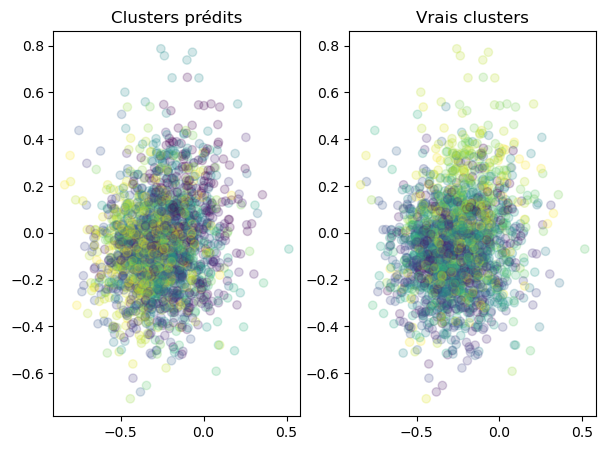

In [5]:
from plots import *
clust_viz_2D(embeddings, labels, pred)